# Competition Spaceship Titanic

## Import des modules de machines learning

In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation de donnée
import matplotlib.pyplot as plt
import seaborn as sns

# sélection des variables 
from scipy import stats
from scipy.stats import pearsonr, mstats

# Création du modèle de machine learning
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# ---Installation et description de la dataframe
df_starship = pd.read_csv(r"C:\Users\yetsu\OneDrive\Documents\projet_data\spaceship-titanic(1)\train.csv")

print('valeurs manquante par colonne:', df_starship.isnull().sum())

print('Types de colonne de df_starship:', df_starship.dtypes)

valeurs manquante par colonne: PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Types de colonne de df_starship: PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [3]:
print('Forme de la dataframe:', df_starship.shape)

Forme de la dataframe: (8693, 14)


## Analyse descriptive 

### Analyse univarié

In [4]:
# Distribution Transporter / non transporté
print('description de variable Transported:', df_starship['Transported'].value_counts())

print('Description de la variable HomePlanet:',df_starship['HomePlanet'].value_counts())

description de variable Transported: Transported
True     4378
False    4315
Name: count, dtype: int64
Description de la variable HomePlanet: HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


In [5]:
def create_hist(var):
    variable = df_starship[var].value_counts()
    
    variable.plot(kind='bar')
    plt.title(f'Histograme de la variable {var}')
    plt.xlabel(f"{var}")
    plt.show()

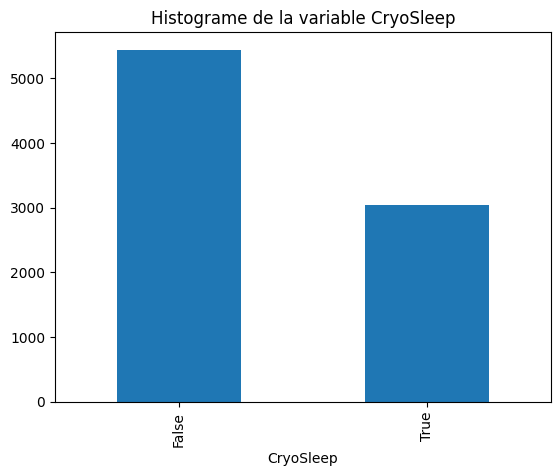

In [6]:
create_hist('CryoSleep')

In [7]:
list_object = ['Destination','HomePlanet', 'VIP']

list_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

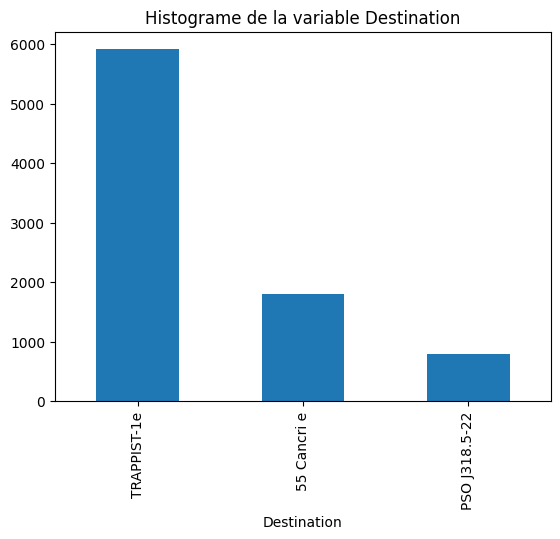

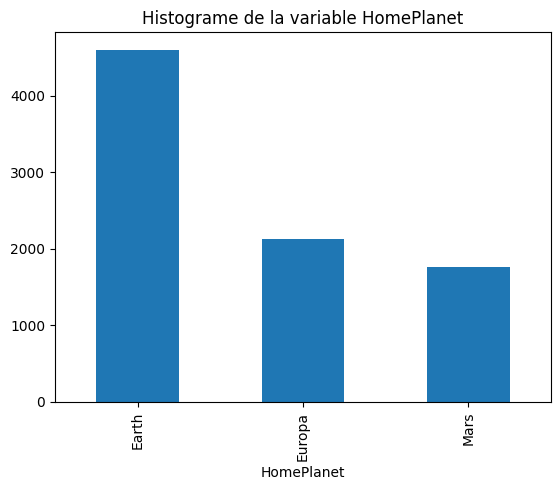

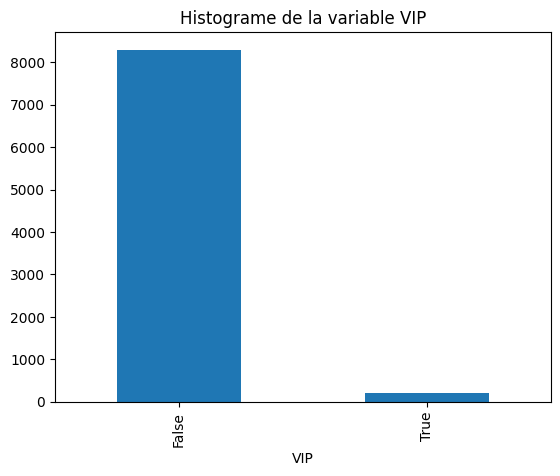

In [8]:
for var in list_object:
    create_hist(var)

In [9]:
def create_boxplot(var):
    variable = df_starship[var]
    
    sns.boxplot(data=df_starship, x=variable)
    plt.title(f'Boxplot de la variable {var}')
    plt.show()

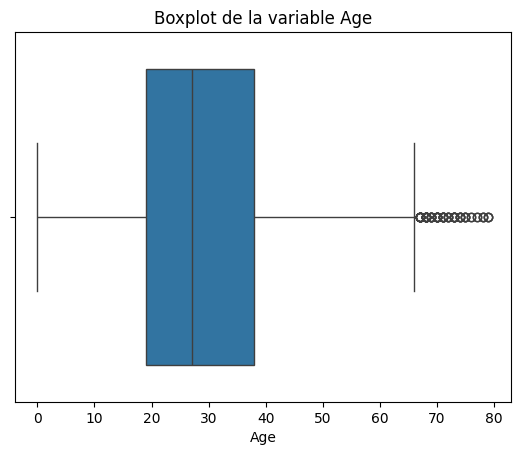

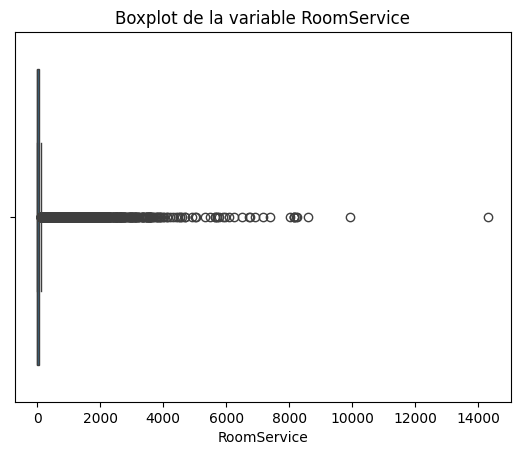

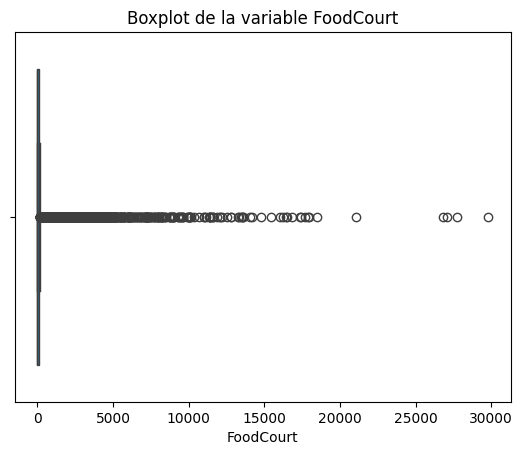

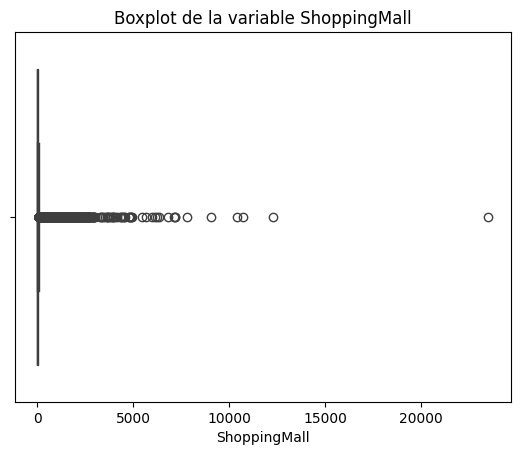

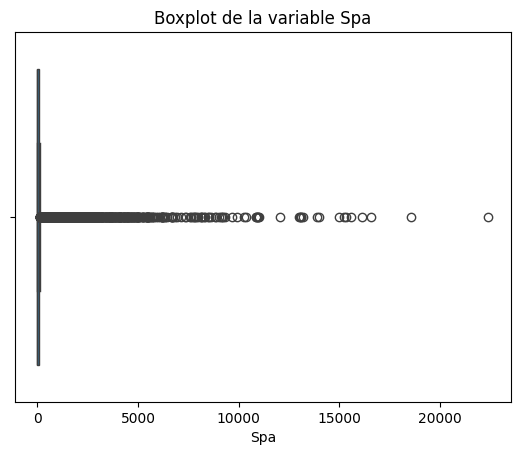

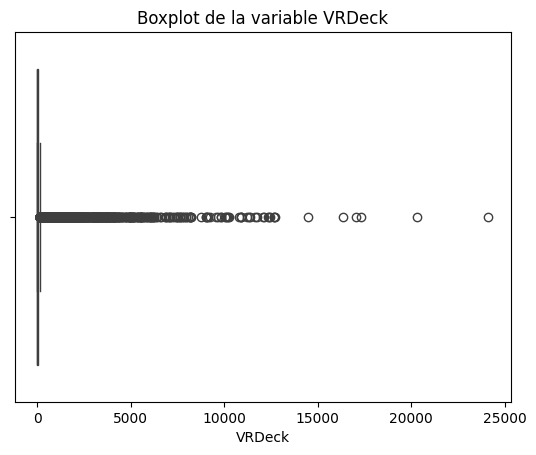

In [10]:
for var in list_num:
    create_boxplot(var)

In [11]:
# Nettoyage et analyse de la variable Cabin car j'ai remarqué une disparité dans les résultats
## création de trois nouvelle variable correspondant au deck/num/side de la cabin

df_starship['Cabin_Deck'] = df_starship['Cabin'].str.split('/').str[0]

df_starship['Cabin_Num'] = (df_starship['Cabin'].str.split('/').str[1].astype('Int64'))

df_starship['Cabin_Side'] = df_starship['Cabin'].str.split('/').str[2]

In [12]:
## Analyse des nouvelles variables

df_starship['Cabin_Deck'].value_counts()

Cabin_Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [13]:
df_starship['Cabin_Num'].value_counts()

Cabin_Num
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: Int64

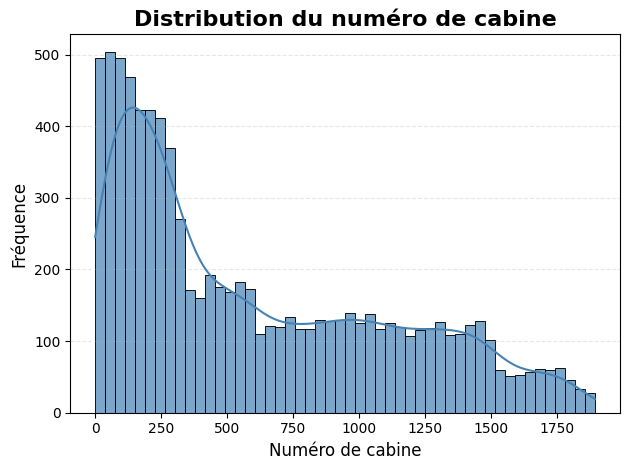

In [14]:
# Histplot 
sns.histplot(
    data=df_starship['Cabin_Num'], 
    bins=50,  
    kde=True,  # Ajoute une courbe de densité
    color='steelblue',  # Couleur personnalisée
    edgecolor='black',  # Bordures des barres
    alpha=0.7  # Transparence
)

# Titres et labels
plt.title('Distribution du numéro de cabine', fontsize=16, fontweight='bold')
plt.xlabel('Numéro de cabine', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Grille pour faciliter la lecture
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajuster les marges
plt.tight_layout()

plt.show()

## Nettoyage de la dataframe avant création du modèle 

Je compte d'abord retirer les valeurs manquantes de chaque colonne puis modifier le type de variables que je possède. Principalement en faisant du onehot encoding pour les variables qui possède plus de deux valeurs

In [15]:
df_starship = df_starship.drop(['Cabin', 'Name'], axis=1)

In [16]:
# Suppression des valeurs manquantes

for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']:
    if not df_starship[col].mode().empty:
        df_starship[col] = df_starship[col].fillna(df_starship[col].mode()[0])

In [17]:
df_starship.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin_Deck        0
Cabin_Num       199
Cabin_Side        0
dtype: int64

In [18]:
# Remplissage des valeurs manquantes pour les valeurs numériques
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']:
    df_starship[col] = df_starship[col].fillna(df_starship[col].mean())
    
df_starship['Cabin_Num'] = df_starship['Cabin_Num'].fillna(3)

In [19]:
# Remplissage des valeurs manquantes pour les variables catégorielle
var_str = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']

# Réalisation du OneHot Encoding pour les variables catégorique:
df_starship = pd.get_dummies(df_starship, columns = var_str, drop_first = True)

df_starship.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Cabin_Num                    0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
Cabin_Deck_B                 0
Cabin_Deck_C                 0
Cabin_Deck_D                 0
Cabin_Deck_E                 0
Cabin_Deck_F                 0
Cabin_Deck_G                 0
Cabin_Deck_T                 0
Cabin_Side_S                 0
dtype: int64

## Réalisation du modèle de machine learning

In [20]:
# Création d'une liste contenant toutes les variables explicatives
colonne_name = df_starship.loc[:, 'Age' : 'Cabin_Side_S'].columns.to_list()

colonne_name.remove('Transported')
print(colonne_name)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Num', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_True', 'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T', 'Cabin_Side_S']


In [21]:
# Test de corrélation entre les variables explicatives et la variables Transported
for var in colonne_name:
    # Test de Pearson
    corr, pval = pearsonr(df_starship[var], df_starship['Transported'])

    results = []
    
    results.append({
        'Variable': var,
        'Corrélation': corr,
        'P-value': pval,
        'Significatif': 'Oui' if pval < 0.05 else 'Non'
        })
        
    print(f"{var:15} | r = {corr:7.4f} | p-value = {pval:.6f} | Sig: {'*' if pval < 0.05 else ''}")

Age             | r = -0.0742 | p-value = 0.000000 | Sig: *
RoomService     | r = -0.2420 | p-value = 0.000000 | Sig: *
FoodCourt       | r =  0.0461 | p-value = 0.000017 | Sig: *
ShoppingMall    | r =  0.0100 | p-value = 0.350293 | Sig: 
Spa             | r = -0.2188 | p-value = 0.000000 | Sig: *
VRDeck          | r = -0.2048 | p-value = 0.000000 | Sig: *
Cabin_Num       | r = -0.0438 | p-value = 0.000043 | Sig: *
HomePlanet_Europa | r =  0.1769 | p-value = 0.000000 | Sig: *
HomePlanet_Mars | r =  0.0195 | p-value = 0.068443 | Sig: 
CryoSleep_True  | r =  0.4601 | p-value = 0.000000 | Sig: *
Destination_PSO J318.5-22 | r =  0.0001 | p-value = 0.993140 | Sig: 
Destination_TRAPPIST-1e | r = -0.0963 | p-value = 0.000000 | Sig: *
VIP_True        | r = -0.0373 | p-value = 0.000511 | Sig: *
Cabin_Deck_B    | r =  0.1447 | p-value = 0.000000 | Sig: *
Cabin_Deck_C    | r =  0.1082 | p-value = 0.000000 | Sig: *
Cabin_Deck_D    | r = -0.0340 | p-value = 0.001499 | Sig: *
Cabin_Deck_E    | r = -

Le test de Pearson démontre que les variables ShoppingMall, HomePlanet_Mars, Destination_PSO, Cabin_Deck_G, Cabin_Deck_T possède une p-value supérieur à 0.05 ne permettant pas de réfuter l'hypothèse null (h0). Ces variables seront dont ignorés lors de la création du modèles

### Modèle de machine learning (Random Forest)

In [22]:
# Suppression des variables non-significative pour la réalisation du modèle
items_to_remove = ['ShoppingMall', 'HomePlanet_MArs', 'Destination_PSO J318.5-22', 'Cabin_Deck_G', 'Cabin_Deck_T']
colonne_name = [col for col in colonne_name if col not in items_to_remove]

In [23]:
# Création des variables X (variable explicative) et y (variables à prédire)
y = df_starship['Transported']

X = df_starship[colonne_name]

In [24]:
# Séparation de la dataframe en echantillion d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Définir les paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [26]:
# Créer le modèle de base
rf = RandomForestClassifier(random_state=42)

# GridSearchCV teste toutes les combinaisons de paramètres
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1
)

In [27]:
# Entraîner et chercher les meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleur score (CV): {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs paramètres: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Meilleur score (CV): 0.8085


In [30]:
# Évaluer sur l'ensemble de test
y_pred = grid_search.predict(X_test)
print(f"\nAccuracy sur le test: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

# Voir les résultats détaillés pour chaque combinaison
results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'std_test_score']])


Accuracy sur le test: 0.7838
Precision: 0.7711
Recall: 0.8132
F1-score: 0.7916
    param_n_estimators param_max_depth  mean_test_score  std_test_score
0                   50               5         0.776246        0.006964
1                  100               5         0.777972        0.010499
2                  200               5         0.776534        0.010585
3                   50               5         0.776534        0.008799
4                  100               5         0.778547        0.009770
..                 ...             ...              ...             ...
211                100            None         0.805723        0.004755
212                200            None         0.807449        0.003729
213                 50            None         0.806011        0.004209
214                100            None         0.808455        0.003115
215                200            None         0.807737        0.003503

[216 rows x 4 columns]


In [31]:
model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200, random_state = 42)

model.fit(X,y)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

## Ajout - Nettoyage - Prédiction sur la nouvelle DataFrame

In [32]:
df_test = pd.read_csv('test.csv')

In [33]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [34]:
df_test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [35]:
# Nettoyage de la dataframe

## Séparation des informations de la variables Cabin
df_test['Cabin_Deck'] = df_test['Cabin'].str.split('/').str[0]

df_test['Cabin_Num'] = (df_test['Cabin'].str.split('/').str[1].astype('Int64'))

df_test['Cabin_Side'] = df_test['Cabin'].str.split('/').str[2]

In [36]:
df_test = df_test.drop(['Cabin', 'Name'], axis=1)

In [37]:
# OneHot Encoding pour les variables catégorielles

var_str = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']

for col in var_str:
    if not df_test[col].mode().empty:
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [38]:
# Remplissage variable numérique
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck']:
    df_test[col] = df_test[col].fillna(df_test[col].mean())
    
df_test['Cabin_Num'] = df_test['Cabin_Num'].fillna(3)

In [39]:
var_str = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_Deck', 'Cabin_Side']

# Réalisation du OneHot Encoding pour les variables catégorique:
df_test = pd.get_dummies(df_test, columns = var_str, drop_first = True)

df_test.isnull().sum()

PassengerId                  0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Cabin_Num                    0
HomePlanet_Europa            0
HomePlanet_Mars              0
CryoSleep_True               0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_True                     0
Cabin_Deck_B                 0
Cabin_Deck_C                 0
Cabin_Deck_D                 0
Cabin_Deck_E                 0
Cabin_Deck_F                 0
Cabin_Deck_G                 0
Cabin_Deck_T                 0
Cabin_Side_S                 0
dtype: int64

In [40]:
# Création d'un nouveau modèle
X_test = df_test[colonne_name]

model = RandomForestClassifier(max_depth = 20, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 200, random_state = 42)

model.fit(X,y)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [41]:
prediction = model.predict(X_test)

In [42]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Transported': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Sauvegarde du modèle de prédiction

In [44]:
# Importation du module joblib
import joblib

# Sauvegarde du modèle et informations utiles
artifacts = {
    'model': model,
    'feature_names': list(X.columns),  # Noms des colonnes
    'score': model.score,  # Performance du modèle
    'classes': model.classes_  # Les classes prédites
}

joblib.dump(artifacts, 'model_complete.pkl')
print("✅ Modèle complet sauvegardé dans 'model_complete.pkl'")

✅ Modèle complet sauvegardé dans 'model_complete.pkl'


In [47]:
# Charger le modèle
loaded_model = joblib.load('model_complete.pkl')

# Faire une prédiction test
test_prediction = loaded_model['model'].predict(X_test.iloc[[0]])
print(f"🔮 Prédiction test : {test_prediction[0]}")

# Vérifier les détails
print(f"Type : {type(loaded_model)}")
print(f"Nombre d'arbres : {loaded_model.n_estimators}")

🔮 Prédiction test : True
Type : <class 'dict'>


AttributeError: 'dict' object has no attribute 'n_estimators'